# Task 1 - User Overview analysis 

In [147]:
#import python library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import math
import seaborn as sns
import plotly.express as px

In [148]:
import os, sys
sys.path.insert(0,'../scripts/')
from Data_exploration import *
from Display_data import *

Loading cleaned Telecom dataset

In [149]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
pd.set_option('max_column', None)
telcom = pd.read_csv('../data/cleaned_data.csv', na_values=['?',"n.a.","NA","n/a", "na", None])
telcom.head()

,Unnamed: 0,Bearer Id,Start,Start ms,End,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Last Location Name,Avg RTT DL (ms),Avg RTT UL (ms),Avg Bearer TP DL (kbps),Avg Bearer TP UL (kbps),DL TP < 50 Kbps (%),50 Kbps < DL TP < 250 Kbps (%),250 Kbps < DL TP < 1 Mbps (%),DL TP > 1 Mbps (%),UL TP < 10 Kbps (%),10 Kbps < UL TP < 50 Kbps (%),50 Kbps < UL TP < 300 Kbps (%),UL TP > 300 Kbps (%),Activity Duration DL (ms),Activity Duration UL (ms),Dur. (ms).1,Handset Manufacturer,Handset Type,Nb of sec with Vol DL < 6250B,Nb of sec with Vol UL < 1250B,Social Media DL (MegaBytes),Social Media UL (MegaBytes),Google DL (MegaBytes),Google UL (MegaBytes),Email DL (MegaBytes),Email UL (MegaBytes),Youtube DL (MegaBytes),Youtube UL (MegaBytes),Netflix DL (MegaBytes),Netflix UL (MegaBytes),Gaming DL (MegaBytes),Gaming UL (MegaBytes),Other DL (MegaBytes),Other UL (MegaBytes),Total UL (MegaBytes),Total DL (MegaBytes)
0,0,"13,114,483,460,844,900,352.00",4/4/2019 12:01,770.00,4/25/2019 14:35,662.00,"1,823,652.00","208,201,448,079,117.00","33,664,962,239.00","35,521,209,507,511.00",9.16456699548519E+015,42.00,5.00,23.00,44.00,100.00,0.00,0.00,0.00,100.00,0.00,0.00,0.00,"37,624.00","38,787.00","1,823,652,892.00",Samsung,Samsung Galaxy A5 Sm-A520F,213.00,214.00,"1,545,765,000,000.00","24,420,000,000.00","1,634,479,000,000.00","1,271,433,000,000.00","3,563,542,000,000.00","137,762,000,000.00","15,854,611,000,000.00","2,501,332,000,000.00","8,198,936,000,000.00","9,656,251,000,000.00","278,082,303,000,000.00","14,344,150,000,000.00","171,744,450,000,000.00","8,814,393,000,000.00","36,749,741,000,000.00","308,879,636,000,000.00"
1,1,"13,114,483,482,878,900,224.00",4/9/2019 13:04,235.00,4/25/2019 8:15,606.00,"1,365,104.00","208,201,909,211,140.00","33,681,854,413.00","35,794,009,006,359.00",L77566A,65.00,5.00,16.00,26.00,100.00,0.00,0.00,0.00,100.00,0.00,0.00,0.00,168.00,"3,560.00","1,365,104,371.00",Samsung,Samsung Galaxy J5 (Sm-J530),971.00,"1,022.00","1,926,113,000,000.00","7,165,000,000.00","3,493,924,000,000.00","920,172,000,000.00","629,046,000,000.00","308,339,000,000.00","20,247,395,000,000.00","19,111,729,000,000.00","18,338,413,000,000.00","17,227,132,000,000.00","608,750,074,000,000.00","1,170,709,000,000.00","526,904,238,000,000.00","15,055,145,000,000.00","53,800,391,000,000.00","653,384,965,000,000.00"
2,2,"13,114,483,484,080,500,736.00",4/9/2019 17:42,1.00,4/25/2019 11:58,652.00,"1,361,762.00","208,200,314,458,056.00","33,760,627,129.00","35,281,510,359,387.00",D42335A,106.20,17.63,6.00,9.00,100.00,0.00,0.00,0.00,100.00,0.00,0.00,0.00,0.00,0.00,"1,361,762,651.00",Samsung,Samsung Galaxy A8 (2018),751.00,695.00,"1,684,053,000,000.00","42,224,000,000.00","8,535,055,000,000.00","1,694,064,000,000.00","2,690,151,000,000.00","672,973,000,000.00","19,725,661,000,000.00","14,699,576,000,000.00","17,587,794,000,000.00","6,163,408,000,000.00","229,584,621,000,000.00","395,630,000,000.00","410,692,588,000,000.00","4,215,763,000,000.00","27,883,638,000,000.00","279,807,335,000,000.00"
3,3,"13,114,483,485,442,799,616.00",4/10/2019 0:31,486.00,4/25/2019 7:36,171.00,"1,321,509.00","208,201,402,342,131.00","33,750,343,200.00","35,356,610,164,913.00",T21824A,106.20,17.63,44.00,44.00,100.00,0.00,0.00,0.00,100.00,0.00,0.00,0.00,"3,330.00","37,882.00","1,321,509,685.00",undefined,undefined,17.00,207.00,"644,121,000,000.00","13,372,000,000.00","9,023,734,000,000.00","2,788,027,000,000.00","1,439,754,000,000.00","631,229,000,000.00","21,388,122,000,000.00","15,146,643,000,000.00","13,994,646,000,000.00","1,097,942,000,000.00","799,538,153,000,000.00","10,849,722,000,000.00","749,039,933,000,000.00","12,797,283,000,000.00","43,324,218,000,000.00","846,028,530,000,000.00"
4,4,"13,114,483,499,480,700,928.00",4/12/2019 20:10,565.00,4/25/2019 10:40,954.00,"1,089,009.00","208,201,401,415,120.00","33,699,795,932.00","35,407,009,745,539.00",D88865A,106.20,17.63,6.00,9.00,100.00,0.00,0.00,0.00,100.00,0.00,0.00,0.00,0.00,0.00,"1,089,009,389.00",Samsung,Samsung Sm-G390F,607.00,604

The column names, how many data points,number of colum etc. All these questions needs to be answered

In [150]:
#info of columns
telcom.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148506 entries, 0 to 148505
Data columns (total 46 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   Unnamed: 0                      148506 non-null  int64  
 1   Bearer Id                       148506 non-null  float64
 2   Start                           148506 non-null  object 
 3   Start ms                        148506 non-null  float64
 4   End                             148506 non-null  object 
 5   End ms                          148506 non-null  float64
 6   Dur. (ms)                       148506 non-null  float64
 7   IMSI                            148506 non-null  float64
 8   MSISDN/Number                   148506 non-null  float64
 9   IMEI                            148506 non-null  float64
 10  Last Location Name              148506 non-null  object 
 11  Avg RTT DL (ms)                 148506 non-null  float64
 12  Avg RTT UL (ms) 

In [151]:
#describe the columns data
telcom.describe()

,Unnamed: 0,Bearer Id,Start ms,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Avg RTT DL (ms),Avg RTT UL (ms),Avg Bearer TP DL (kbps),Avg Bearer TP UL (kbps),DL TP < 50 Kbps (%),50 Kbps < DL TP < 250 Kbps (%),250 Kbps < DL TP < 1 Mbps (%),DL TP > 1 Mbps (%),UL TP < 10 Kbps (%),10 Kbps < UL TP < 50 Kbps (%),50 Kbps < UL TP < 300 Kbps (%),UL TP > 300 Kbps (%),Activity Duration DL (ms),Activity Duration UL (ms),Dur. (ms).1,Nb of sec with Vol DL < 6250B,Nb of sec with Vol UL < 1250B,Social Media DL (MegaBytes),Social Media UL (MegaBytes),Google DL (MegaBytes),Google UL (MegaBytes),Email DL (MegaBytes),Email UL (MegaBytes),Youtube DL (MegaBytes),Youtube UL (MegaBytes),Netflix DL (MegaBytes),Netflix UL (MegaBytes),Gaming DL (MegaBytes),Gaming UL (MegaBytes),Other DL (MegaBytes),Other UL (MegaBytes),Total UL (MegaBytes),Total DL (MegaBytes)
count,"148,506.00","148,506.00","148,506.00","148,506.00","148,506.00","148,506.00","148,506.00","148,506.00","148,506.00","148,506.00","148,506.00","148,506.00","148,506.00","148,506.00","148,506.00","148,506.00","148,506.00","148,506.00","148,506.00","148,506.00","148,506.00","148,506.00","148,506.00","148,506.00","148,506.00","148,506.00","148,506.00","148,506.00","148,506.00","148,506.00","148,506.00","148,506.00","148,506.00","148,506.00","148,506.00","148,506.00","148,506.00","148,506.00","148,506.00","148,506.00","148,506.00"
mean,"75,154.15","10,146,757,650,164,756,480.00",499.21,498.64,"105,084.05","208,201,599,922,260.41","41,906,541,782.21","48,500,684,616,792.02",106.20,17.63,"13,287.52","1,770.60",92.87,3.05,1.71,1.61,98.53,0.78,0.15,0.08,"1,837,842.18","1,414,772.77","105,084,600.60","3,733.07","4,034.70","1,795,144,107,793.62","32,922,085,511.70","5,751,770,333,185.21","2,056,292,551,257.19","1,791,784,695,049.36","467,403,486,896.15","11,633,868,432,925.21","11,008,567,698,039.09","11,627,241,739,801.89","11,001,902,340,383.59","422,064,222,695,166.12","8,289,599,585,855.15","421,152,465,355,838.62","8,262,685,049,014.91","41,119,372,796,957.69","454,664,032,003,922.62"
std,"43,278.82","2,893,261,633,271,228,928.00",288.56,288.07,"81,072.74","15,243,472,825.67","2,450,975,846,357.30","22,432,166,298,203.47",529.63,76.47,"23,993.48","4,630.31",13.00,6.19,4.15,4.82,4.63,3.22,1.63,1.30,"5,717,904.09","4,661,843.93","81,072,729.72","9,180.40","10,166.68","1,035,470,106,067.68","19,008,988,275.56","3,308,754,951,886.34","1,189,939,105,836.45","1,035,955,740,372.85","269,981,911,952.63","6,711,236,448,363.79","6,345,625,174,326.99","6,724,993,743,296.46","6,357,929,847,834.09","244,004,290,262,823.50","4,781,966,863,185.48","243,163,937,385,372.78","4,768,806,065,694.65","11,278,441,201,269.67","244,179,073,240,083.56"
min,0.00,"6,917,537,518,543,529,984.00",0.00,0.00,"7,142.00","204,047,108,489,451.00","33,601,001,722.00","440,015,202,000.00",0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,"7,142,988.00",1.00,1.00,"12,000,000.00",0.00,"207,000,000.00","3,000,000.00","14,000,000.00","2,000,000.00","53,000,000.00","105,000,000.00","42,000,000.00","35,000,000.00","2,516,000,000.00","59,000,000.00","3,290,000,000.00","148,000,000.00","2,866,892,000,000.00","7,114,041,000,000.00"
25%,"37,802.25","7,349,883,247,462,785,024.00",250.00,251.00,"58,248.75","208,201,401,264,008.00","33,651,311,444.25","35,460,708,962,514.00",35.00,3.00,43.00,47.00,91.00,0.00,0.00,0.00,99.00,0.00,0.00,0.00,"14,848.00","21,499.00","58,249,644.50",87.00,106.00,"899,044,500,000.00","16,431,000,000.00","2,883,392,750,000.00","1,023,967,000,000.00","892,620,750,000.00","233,445,000,000.00","5,833,290,250,000.00","5,515,832,000,000.00","5,778,898,500,000.00","5,476,773,750,000.00","210,476,489,000,000.00","4,130,680,000,000.00","210,304,184,500,000.00","4,144,178,750,000.00","33,218,278,000,000.00","243,126,304,250,000.00"
50%,"75,063.50","7,349,883,264,172,940,288.00",499.00,500.00,"86,399.00","208,201,546,332,650.50","33,663,708,556.00","35,722,309,017,450.00",54.00,7.00,63.00,62.00,100.00,0.00,0.00,0.0

In [152]:
telcom.drop(['Unnamed: 0'], axis=1, inplace=True)

In [153]:
# column names
telcom[['Dur. (ms).1']].describe()

,Dur. (ms).1
count,"148,506.00"
mean,"105,084,600.60"
std,"81,072,729.72"
min,"7,142,988.00"
25%,"58,249,644.50"
50%,"86,399,986.00"
75%,"132,933,303.50"
max,"1,859,336,442.00"


For better understanding of the columns, exploring the data description [here](https://github.com/BirhanuGebisa/Telecom-User-Analytics/blob/telcom/data/Field%20Descriptions.xlsx) will help

In [154]:
# number of data points
print(f" There are {telcom.shape[0]} rows and {telcom.shape[1]} columns")

 There are 148506 rows and 45 columns


### Full User Overview analysis & the following sub-tasks
 Identify 
  - Top 10 handsets used by the customers
  - Top 3 handset manufacturers
  - Top 5 handsets per top 3 handset manufacturer
### Interpretation and recommendation to marketing teams

### Top 10 handsets used by the customers

Huawei B528S-23A                19727
Apple iPhone 6S (A1688)          9395
Apple iPhone 6 (A1586)           8993
undefined                        8904
Apple iPhone 7 (A1778)           6279
Apple iPhone Se (A1723)          5165
Apple iPhone 8 (A1905)           4977
Apple iPhone Xr (A2105)          4556
Samsung Galaxy S8 (Sm-G950F)     4464
Apple iPhone X (A1901)           3806
Name: Handset Type, dtype: int64

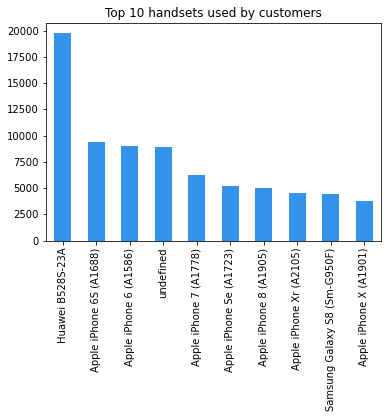

In [155]:
#Top 10 handsets used by the customers
handset_type= telcom['Handset Type'].value_counts()[0:10]
handset_type.plot.bar(x='Handset Type', title="Top 10 handsets used by customers", stacked=True, color='#3492eb')
handset_type

### Top 3 handset manufacturers

Apple      59339
Samsung    40429
Huawei     34296
Name: Handset Manufacturer, dtype: int64

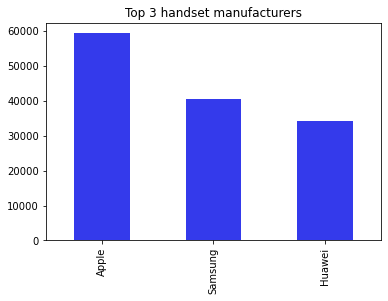

In [156]:
#
Handset_manu = telcom['Handset Manufacturer'].value_counts()[0:3]
Handset_manu.plot.bar(x='Handset Manufacturer', title="Top 3 handset manufacturers", stacked=True, color='#343aeb')
Handset_manu

### Top 5 handsets per top 3 handset manufacturer

count
Handset Manufacturer Handset Type                  
Apple                Apple iPhone 6S (A1688)   9395
                     Apple iPhone 6 (A1586)    8993
                     Apple iPhone 7 (A1778)    6279
                     Apple iPhone Se (A1723)   5165
                     Apple iPhone 8 (A1905)    4977

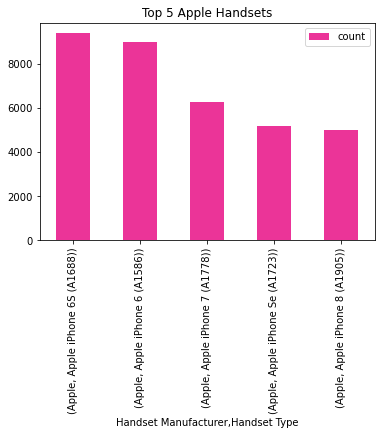

In [157]:
#Top apple manufacturer handset
top_apple = telcom.loc[telcom['Handset Manufacturer'] == 'Apple']
top_apple = top_apple.groupby(['Handset Manufacturer', 'Handset Type']).agg({'Handset Type': ['count']})
top_apple.columns = ['count']
top_apple=top_apple.nlargest(5, 'count')
top_apple.plot.bar(y='count', title="Top 5 Apple Handsets", stacked=True, color='#eb3498')
top_apple

count
Handset Manufacturer Handset Type                       
Samsung              Samsung Galaxy S8 (Sm-G950F)   4464
                     Samsung Galaxy A5 Sm-A520F     3700
                     Samsung Galaxy J5 (Sm-J530)    3675
                     Samsung Galaxy J3 (Sm-J330)    3456
                     Samsung Galaxy S7 (Sm-G930X)   3171

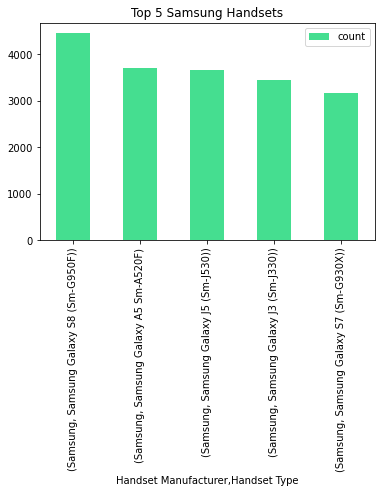

In [158]:
#Top samsung manufacturer handset
top_samsung = telcom.loc[telcom['Handset Manufacturer'] == 'Samsung']
top_samsung = top_samsung.groupby(['Handset Manufacturer', 'Handset Type']).agg({'Handset Type': ['count']})
top_samsung.columns = ['count']
top_samsung=top_samsung.nlargest(5, 'count')
top_samsung.plot.bar(y='count', title="Top 5 Samsung Handsets", stacked=True, color='#45De90')
top_samsung

count
Handset Manufacturer Handset Type                         
Huawei               Huawei B528S-23A                19727
                     Huawei E5180                     2074
                     Huawei P20 Lite Huawei Nova 3E   2012
                     Huawei P20                       1475
                     Huawei Y6 2018                    996

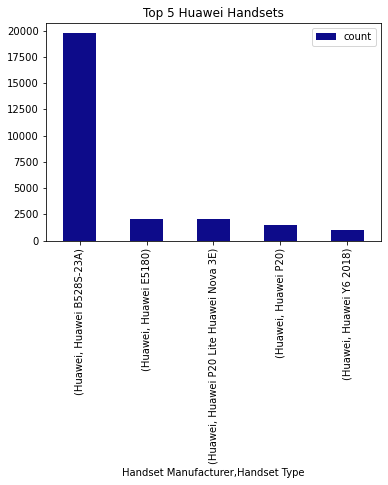

In [159]:
#Top huawei manufacturer handset
top_huawei = telcom.loc[telcom['Handset Manufacturer'] == 'Huawei']
top_huawei = top_huawei.groupby(['Handset Manufacturer', 'Handset Type']).agg({'Handset Type': ['count']})
top_huawei.columns = ['count']
top_huawei=top_huawei.nlargest(5, 'count')
top_huawei.plot.bar(y='count', title="Top 5 Huawei Handsets", stacked=True, color='#0d0b8a')
top_huawei

#### Conclusion of the Analysis shows:

- The most used handset model by customer is Huawei B528S-23A which is manufactured by Huawei
- The top 3 handset manufacturers first Apple total of 59339, second Samsung total of 40429, and third Huawei total of 34296
- Apple's Handset are not prefered by more customers and Samsung manufacturers also the same with apple's.
- Huawei Handsets manufacturers can be recommended to increase the manufacturing capability to increase there acces to customers.

In telecommunication, CDR or Call Detail Record is the voice channel and XDR is the data channel equivalent. 
So here, consider xDR as data sessions Detail Record. 
In xDR, user behavior can be tracked through the following applications:  
Social Media, Google, Email, Youtube, Netflix, Gaming, Other . 

### Task 1.1 - Your employer wants to have an overview of the users’ behavior on those applications.   
- Aggregate per user the following information in the column  
   - number of xDR sessions
   - Session duration
   - the total download (DL) and upload (UL) data
   - the total data volume (in Bytes) during this session for each application

#### Number of xDR sessions

In [165]:
telcom.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148506 entries, 0 to 148505
Data columns (total 45 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   Bearer Id                       148506 non-null  float64
 1   Start                           148506 non-null  object 
 2   Start ms                        148506 non-null  float64
 3   End                             148506 non-null  object 
 4   End ms                          148506 non-null  float64
 5   Dur. (ms)                       148506 non-null  float64
 6   IMSI                            148506 non-null  float64
 7   MSISDN/Number                   148506 non-null  float64
 8   IMEI                            148506 non-null  float64
 9   Last Location Name              148506 non-null  object 
 10  Avg RTT DL (ms)                 148506 non-null  float64
 11  Avg RTT UL (ms)                 148506 non-null  float64
 12  Avg Bearer TP DL

In [167]:
#getting the number od xDR sessions
telcom[['Dur. (ms).1']].describe()

,Dur. (ms).1
count,"148,506.00"
mean,"105,084,600.60"
std,"81,072,729.72"
min,"7,142,988.00"
25%,"58,249,644.50"
50%,"86,399,986.00"
75%,"132,933,303.50"
max,"1,859,336,442.00"


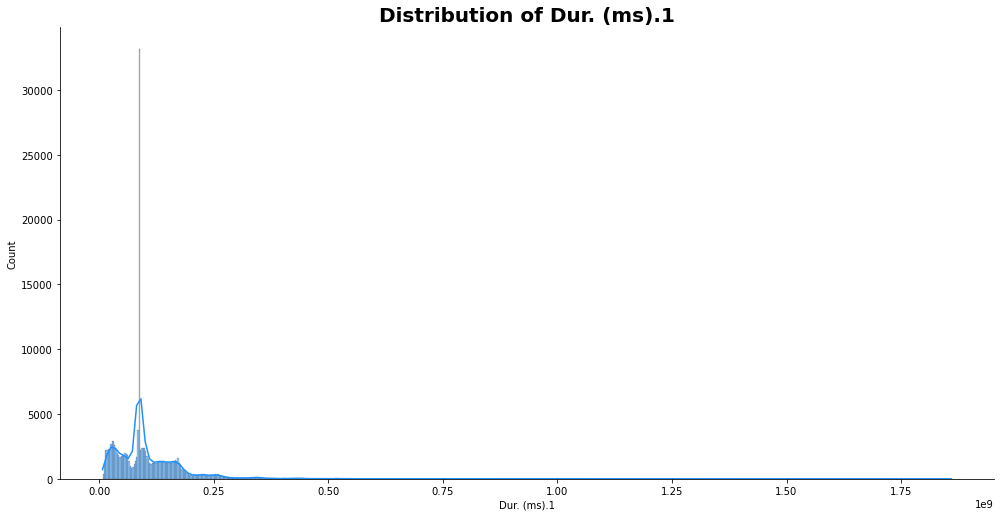

In [163]:
plot_hist(telcom, 'Dur. (ms).1', 'dodgerblue')

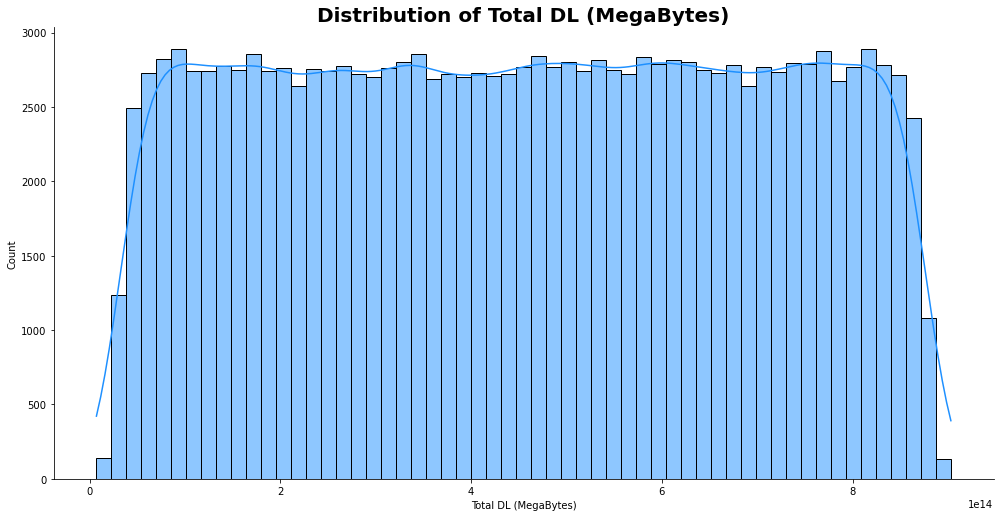

In [169]:
plot_hist(telcom, 'Total DL (MegaBytes)', 'dodgerblue')

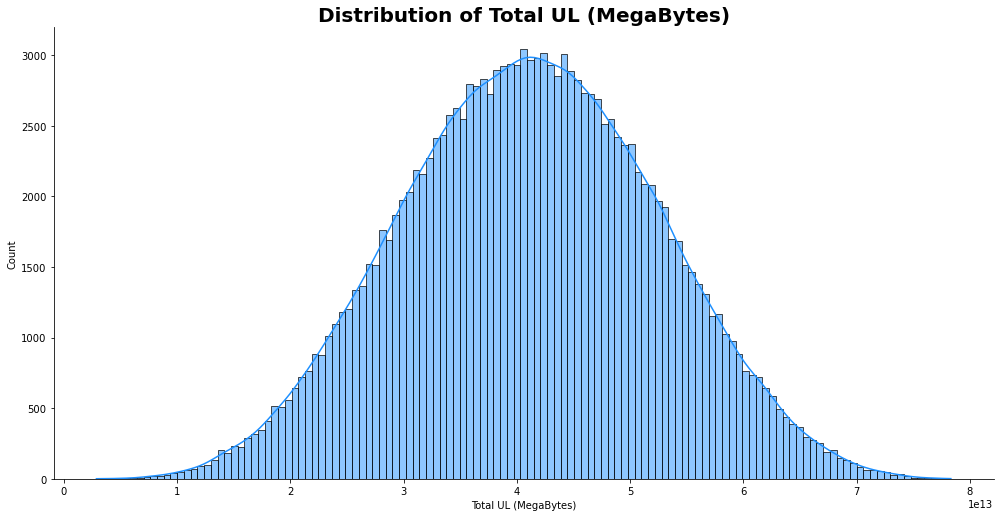

In [170]:
plot_hist(telcom, 'Total UL (MegaBytes)', 'dodgerblue')

In [174]:
# Aggregation of Total values
clean_data["Total Uploads"]=telcom["Google UL (MegaBytes)"]+telcom["Email UL (MegaBytes)"]+telcom["Social Media UL (MegaBytes)"]+telcom["Youtube UL (MegaBytes)"]+telcom["Netflix UL (MegaBytes)"]+telcom["Gaming UL (MegaBytes)"]+telcom["Other UL (MegaBytes)"]
clean_data["Total Downloads"]=telcom["Google DL (MegaBytes)"]+telcom["Email DL (MegaBytes)"]+telcom["Social Media DL (MegaBytes)"]+telcom["Youtube DL (MegaBytes)"]+telcom["Netflix DL (MegaBytes)"]+telcom["Gaming DL (MegaBytes)"]+telcom["Other DL (MegaBytes)"]
clean_data['Total UL and DL']=telcom['Total DL (MegaBytes)']+telcom["Total UL (MegaBytes)"]

In [182]:
clean_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 106471 entries, 0 to 106470
Data columns (total 5 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   MSISDN/Number       106471 non-null  float64
 1   no.of xDR sessions  106471 non-null  int64  
 2   Total Uploads       106471 non-null  float64
 3   Total Downloads     106471 non-null  float64
 4   Total UL and DL     106471 non-null  float64
dtypes: float64(4), int64(1)
memory usage: 4.1 MB


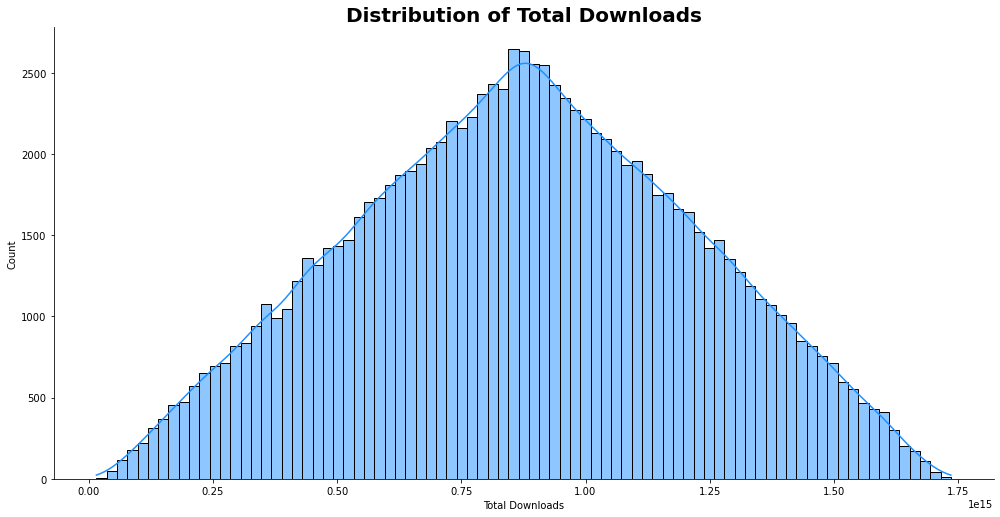

In [183]:
plot_hist(clean_data, 'Total Downloads', 'dodgerblue')

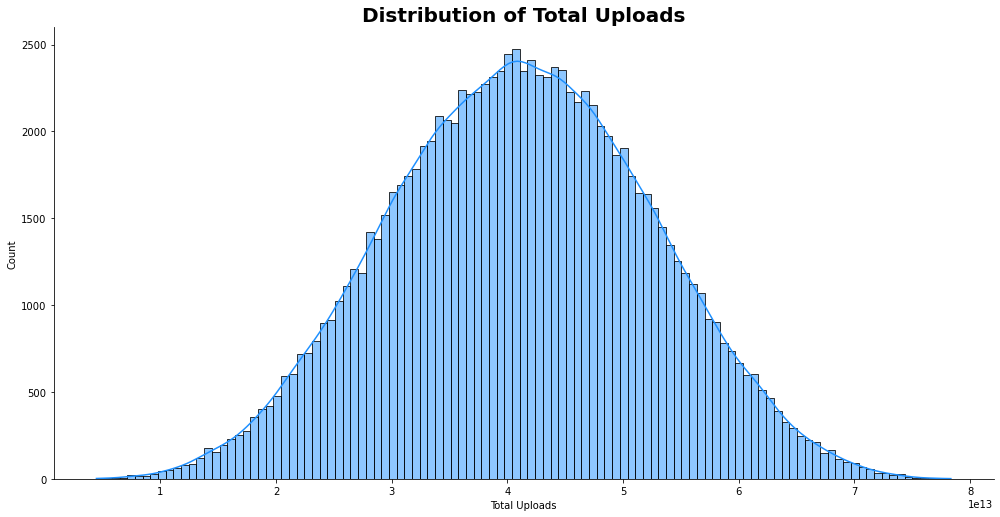

In [204]:
plot_hist(clean_data, 'Total Uploads', 'dodgerblue')

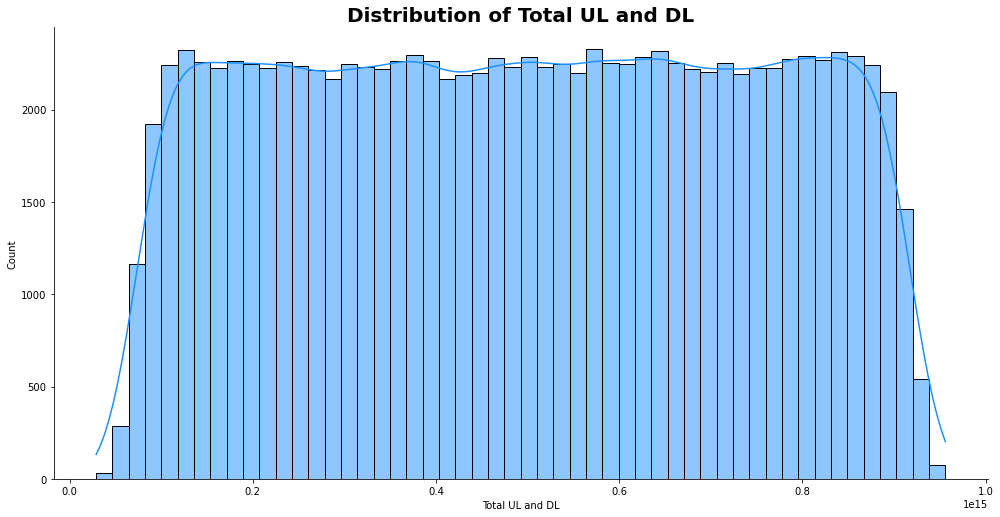

In [206]:
plot_hist(clean_data, 'Total UL and DL', 'dodgerblue')

In [188]:
# Aggregation of Total Social Media data
clean_data["Youtube_Total_Data"]=telcom["Youtube DL (MegaBytes)"]+telcom["Youtube UL (MegaBytes)"]
clean_data["Google_Total_Data"]=telcom["Google DL (MegaBytes)"]+telcom["Google UL (MegaBytes)"]
clean_data["Email_Total_Data"]=telcom["Email DL (MegaBytes)"]+telcom["Email UL (MegaBytes)"]
clean_data["Social_Media_Total_Data"]=telcom["Social Media DL (MegaBytes)"]+telcom["Social Media UL (MegaBytes)"]
clean_data["Netflix_Total_Data"]=telcom["Netflix DL (MegaBytes)"]+telcom["Netflix UL (MegaBytes)"]
clean_data["Gaming_Total_Data"]=telcom["Gaming DL (MegaBytes)"]+telcom["Gaming UL (MegaBytes)"]
clean_data["Other_Total_Data"]=telcom["Other DL (MegaBytes)"]+telcom["Other UL (MegaBytes)"]

In [189]:
clean_data["Social_Media_Total_Data"].describe()

count             106,471.00
mean    1,828,862,876,388.88
std     1,035,304,416,580.68
min         2,003,000,000.00
25%       934,658,500,000.00
50%     1,827,094,000,000.00
75%     2,725,418,000,000.00
max     3,650,861,000,000.00
Name: Social_Media_Total_Data, dtype: float64

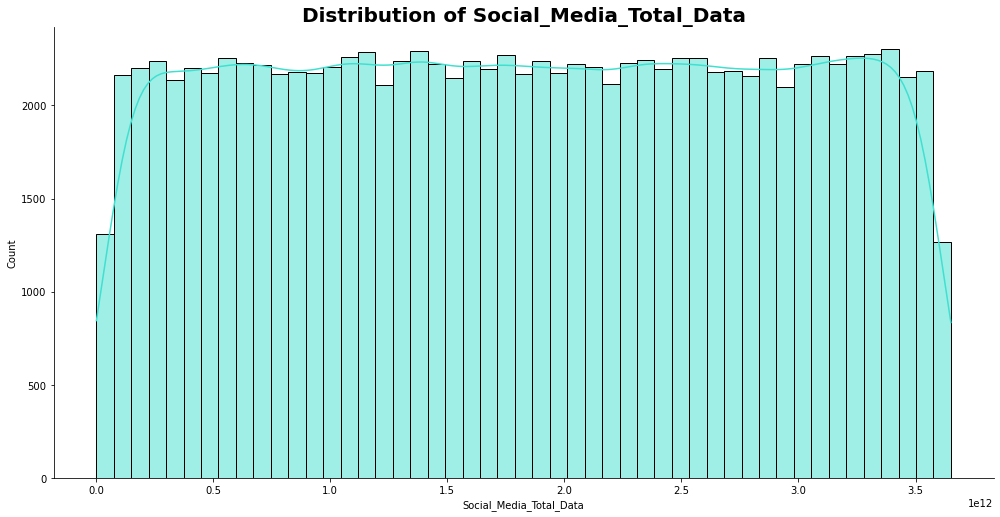

In [190]:
plot_hist(clean_data, 'Social_Media_Total_Data', '#40E0D0')

In [192]:
clean_data[['Google_Total_Data']].describe()

,Google_Total_Data
count,"106,471.00"
mean,"7,808,389,144,997.21"
std,"3,519,466,920,815.23"
min,"40,330,000,000.00"
25%,"4,938,550,500,000.00"
50%,"7,818,410,000,000.00"
75%,"10,685,135,000,000.00"
max,"15,528,782,000,000.00"


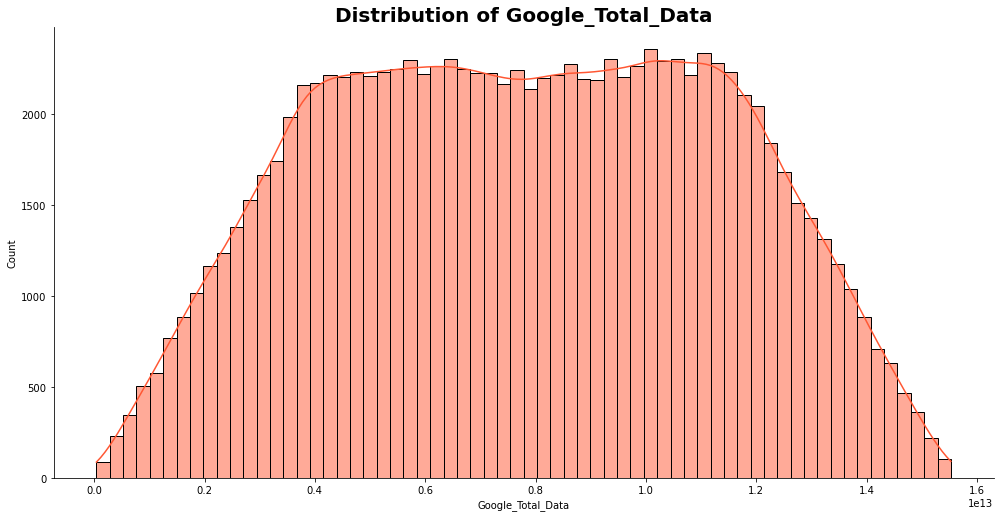

In [193]:
plot_hist(clean_data, 'Google_Total_Data', '#FF5733')

In [194]:
clean_data[['Email_Total_Data']].describe()

,Email_Total_Data
count,"106,471.00"
mean,"2,256,444,595,035.27"
std,"1,070,783,224,279.76"
min,"8,359,000,000.00"
25%,"1,355,572,000,000.00"
50%,"2,261,942,000,000.00"
75%,"3,157,412,500,000.00"
max,"4,518,036,000,000.00"


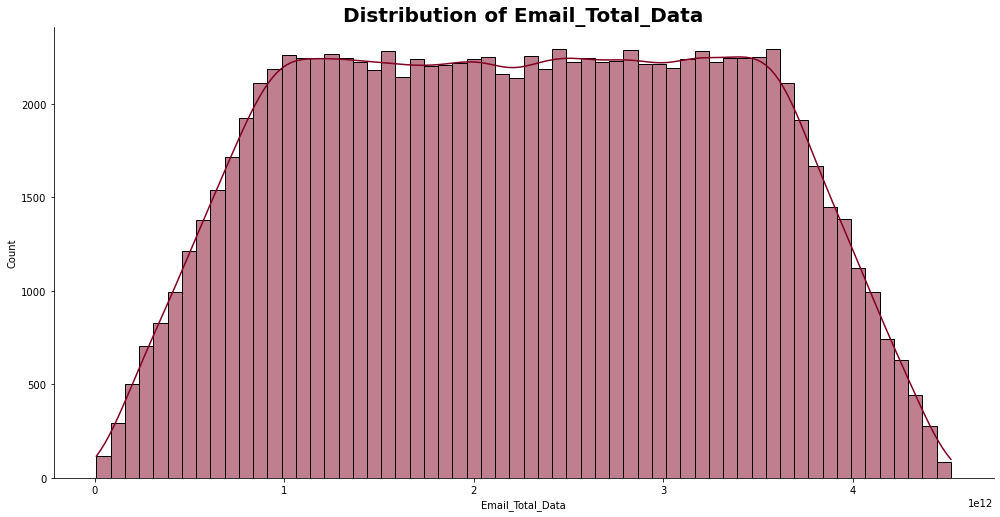

In [195]:
plot_hist(clean_data, 'Email_Total_Data', '#800020')

In [196]:
clean_data[['Youtube_Total_Data']].describe()

,Youtube_Total_Data
count,"106,471.00"
mean,"22,614,241,990,842.62"
std,"9,249,965,701,666.13"
min,"129,655,000,000.00"
25%,"15,981,058,500,000.00"
50%,"22,632,593,000,000.00"
75%,"29,260,317,500,000.00"
max,"45,190,078,000,000.00"


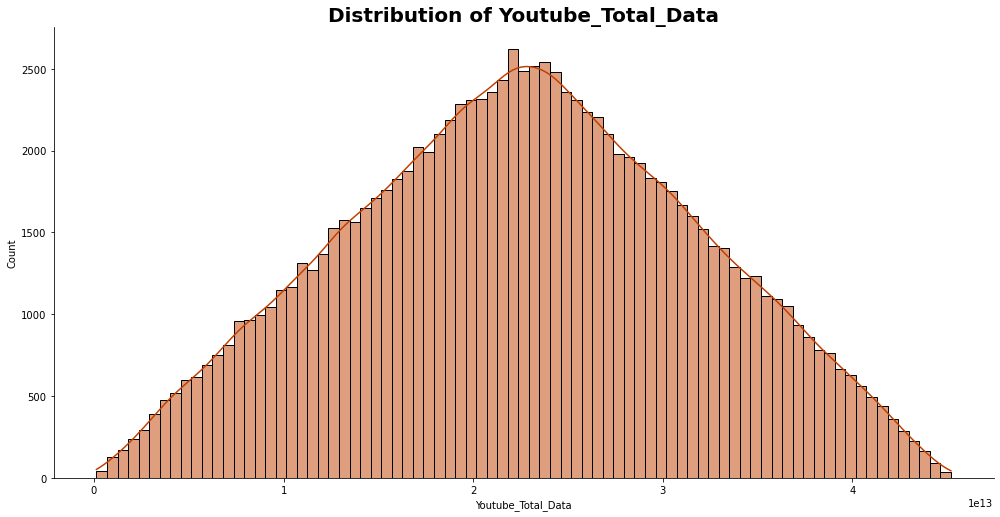

In [197]:
plot_hist(clean_data, 'Youtube_Total_Data', '#C04000')

In [198]:
clean_data[['Netflix_Total_Data']].describe()

,Netflix_Total_Data
count,"106,471.00"
mean,"22,638,743,471,339.72"
std,"9,261,200,812,681.19"
min,"98,432,000,000.00"
25%,"15,993,025,000,000.00"
50%,"22,637,332,000,000.00"
75%,"29,307,006,000,000.00"
max,"45,198,153,000,000.00"


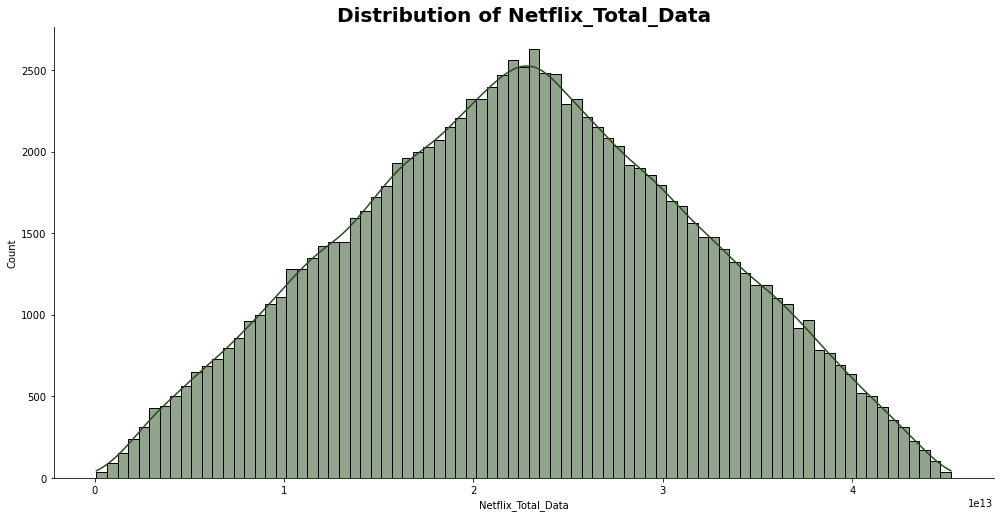

In [200]:
plot_hist(clean_data, 'Netflix_Total_Data', color="#294a1f")

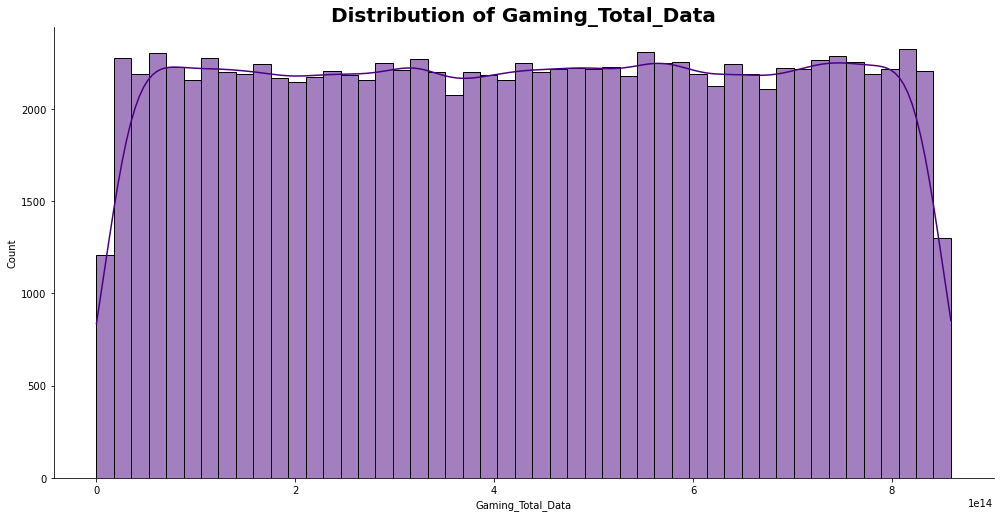

In [201]:
plot_hist(clean_data, 'Gaming_Total_Data', 'indigo')

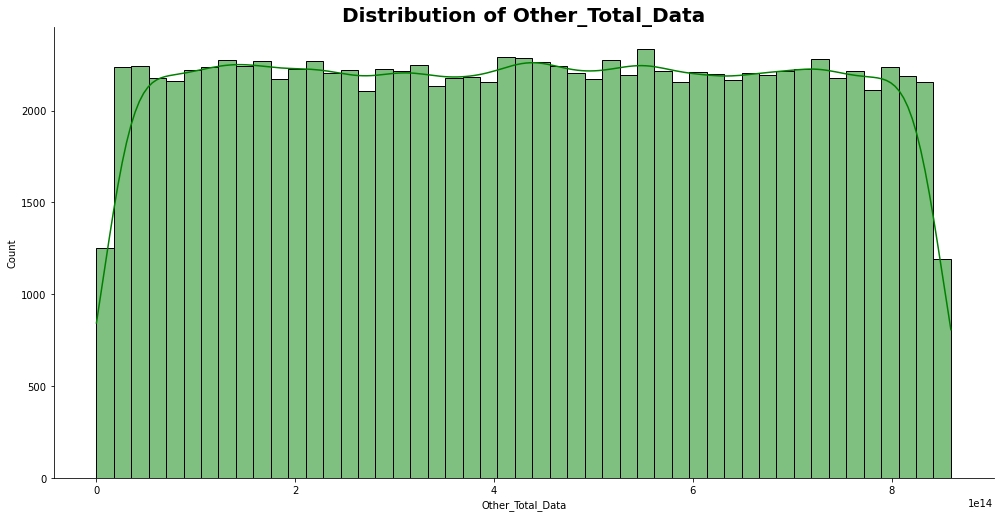

In [202]:
plot_hist(clean_data, 'Other_Total_Data', 'green')

In [207]:
clean_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 106471 entries, 0 to 106470
Data columns (total 12 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   MSISDN/Number            106471 non-null  float64
 1   no.of xDR sessions       106471 non-null  int64  
 2   Total Uploads            106471 non-null  float64
 3   Total Downloads          106471 non-null  float64
 4   Total UL and DL          106471 non-null  float64
 5   Youtube_Total_Data       106471 non-null  float64
 6   Google_Total_Data        106471 non-null  float64
 7   Email_Total_Data         106471 non-null  float64
 8   Social_Media_Total_Data  106471 non-null  float64
 9   Netflix_Total_Data       106471 non-null  float64
 10  Gaming_Total_Data        106471 non-null  float64
 11  Other_Total_Data         106471 non-null  float64
dtypes: float64(11), int64(1)
memory usage: 9.7 MB


In [118]:
# Time aggregates
clean_data['Start ms']=telcom['Start ms']
clean_data['End ms']=telcom['End ms']
clean_data['Start']=telcom['Start']
clean_data['End']=telcom['End']
clean_data['Avg Delay (ms)']=telcom['Avg RTT UL (ms)']+telcom['Avg RTT DL (ms)']
clean_data['Dur. (ms)']=telcom['Dur. (ms)']
clean_data['Dur. (ms).1']=telcom['Dur. (ms).1']
clean_data["Activity_Duration(ms)"]=telcom['Activity Duration UL (ms)']+telcom['Activity Duration DL (ms)']

In [119]:
clean_data.head()

,MSISDN/Number,no.of xDR sessions,Total Uploads,Total Downloads,Total UL and DL,Youtube_Total_Data,Google_Total_Data,Email_Total_Data,Social_Media_Total_Data,Netflix_Total_Data,Gaming_Total_Data,Other_Total_Data,Start ms,End ms,Start,End,Avg Delay (ms),Dur. (ms),Dur. (ms).1,Activity_Duration(ms)
0,"33,601,001,722.00",1,"36,749,741,000,000.00","480,624,086,000,000.00","345,629,377,000,000.00","18,355,943,000,000.00","2,905,912,000,000.00","3,701,304,000,000.00","1,570,185,000,000.00","17,855,187,000,000.00","292,426,453,000,000.00","180,558,843,000,000.00",770.00,662.00,4/4/2019 12:01,4/25/2019 14:35,47.00,"1,823,652.00","1,823,652,892.00","76,411.00"
1,"33,601,001,754.00",1,"53,800,391,000,000.00","1,180,289,203,000,000.00","707,185,356,000,000.00","39,359,124,000,000.00","4,414,096,000,000.00","937,385,000,000.00","1,933,278,000,000.00","35,565,545,000,000.00","609,920,783,000,000.00","541,959,383,000,000.00",235.00,606.00,4/9/2019 13:04,4/25/2019 8:15,70.00,"1,365,104.00","1,365,104,371.00","3,728.00"
2,"33,601,002,511.00",1,"27,883,638,000,000.00","690,499,923,000,000.00","307,690,973,000,000.00","34,425,237,000,000.00","10,229,119,000,000.00","3,363,124,000,000.00","1,726,277,000,000.00","23,751,202,000,000.00","229,980,251,000,000.00","414,908,351,000,000.00",1.00,652.00,4/9/2019 17:42,4/25/2019 11:58,123.83,"1,361,762.00","1,361,762,651.00",0.00
3,"33,601,007,832.00",1,"43,324,218,000,000.00","1,595,068,463,000,000.00","889,352,748,000,000.00","36,534,765,000,000.00","11,811,761,000,000.00","2,070,983,000,000.00","657,493,000,000.00","15,092,588,000,000.00","810,387,875,000,000.00","761,837,216,000,000.00",486.00,171.00,4/10/2019 0:31,4/25/2019 7:36,123.83,"1,321,509.00","1,321,509,685.00","41,212.00"
4,"33,601,008,617.00",2,"38,542,814,000,000.00","1,119,848,089,000,000.00","607,681,403,000,000.00","34,222,253,000,000.00","7,748,843,000,000.00","2,110,349,000,000.00","912,788,000,000.00","17,539,799,000,000.00","531,237,049,000,000.00","564,619,822,000,000.00",565.00,954.00,4/12/2019 20:10,4/25/2019 10:40,123.83,"1,089,009.00","1,089,009,389.00",0.00


In [120]:
# total speed kbps
clean_data['Avg Throughput (kbps)']=telcom['Avg Bearer TP UL (kbps)']+telcom['Avg Bearer TP DL (kbps)']

In [121]:
clean_data.head()

,MSISDN/Number,no.of xDR sessions,Total Uploads,Total Downloads,Total UL and DL,Youtube_Total_Data,Google_Total_Data,Email_Total_Data,Social_Media_Total_Data,Netflix_Total_Data,Gaming_Total_Data,Other_Total_Data,Start ms,End ms,Start,End,Avg Delay (ms),Dur. (ms),Dur. (ms).1,Activity_Duration(ms),Avg Throughput (kbps)
0,"33,601,001,722.00",1,"36,749,741,000,000.00","480,624,086,000,000.00","345,629,377,000,000.00","18,355,943,000,000.00","2,905,912,000,000.00","3,701,304,000,000.00","1,570,185,000,000.00","17,855,187,000,000.00","292,426,453,000,000.00","180,558,843,000,000.00",770.00,662.00,4/4/2019 12:01,4/25/2019 14:35,47.00,"1,823,652.00","1,823,652,892.00","76,411.00",67.00
1,"33,601,001,754.00",1,"53,800,391,000,000.00","1,180,289,203,000,000.00","707,185,356,000,000.00","39,359,124,000,000.00","4,414,096,000,000.00","937,385,000,000.00","1,933,278,000,000.00","35,565,545,000,000.00","609,920,783,000,000.00","541,959,383,000,000.00",235.00,606.00,4/9/2019 13:04,4/25/2019 8:15,70.00,"1,365,104.00","1,365,104,371.00","3,728.00",42.00
2,"33,601,002,511.00",1,"27,883,638,000,000.00","690,499,923,000,000.00","307,690,973,000,000.00","34,425,237,000,000.00","10,229,119,000,000.00","3,363,124,000,000.00","1,726,277,000,000.00","23,751,202,000,000.00","229,980,251,000,000.00","414,908,351,000,000.00",1.00,652.00,4/9/2019 17:42,4/25/2019 11:58,123.83,"1,361,762.00","1,361,762,651.00",0.00,15.00
3,"33,601,007,832.00",1,"43,324,218,000,000.00","1,595,068,463,000,000.00","889,352,748,000,000.00","36,534,765,000,000.00","11,811,761,000,000.00","2,070,983,000,000.00","657,493,000,000.00","15,092,588,000,000.00","810,387,875,000,000.00","761,837,216,000,000.00",486.00,171.00,4/10/2019 0:31,4/25/2019 7:36,123.83,"1,321,509.00","1,321,509,685.00","41,212.00",88.00
4,"33,601,008,617.00",2,"38,542,814,000,000.00","1,119,848,089,000,000.00","607,681,403,000,000.00","34,222,253,000,000.00","7,748,843,000,000.00","2,110,349,000,000.00","912,788,000,000.00","17,539,799,000,000.00","531,237,049,000,000.00","564,619,822,000,000.00",565.00,954.00,4/12/2019 20:10,4/25/2019 10:40,123.83,"1,089,009.00","1,089,009,389.00",0.00,15.00


In [122]:
# categorical Variables
clean_data['Handset Manufacturer']=telcom['Handset Manufacturer']
clean_data['Handset Type']=telcom['Handset Type']
clean_data['Last Location Name']=telcom['Last Location Name']
clean_data['IMSI']=telcom['IMSI']
clean_data['IMEI']=telcom['IMEI']

In [123]:
clean_data.head()

,MSISDN/Number,no.of xDR sessions,Total Uploads,Total Downloads,Total UL and DL,Youtube_Total_Data,Google_Total_Data,Email_Total_Data,Social_Media_Total_Data,Netflix_Total_Data,Gaming_Total_Data,Other_Total_Data,Start ms,End ms,Start,End,Avg Delay (ms),Dur. (ms),Dur. (ms).1,Activity_Duration(ms),Avg Throughput (kbps),Handset Manufacturer,Handset Type,Last Location Name,IMSI,IMEI
0,"33,601,001,722.00",1,"36,749,741,000,000.00","480,624,086,000,000.00","345,629,377,000,000.00","18,355,943,000,000.00","2,905,912,000,000.00","3,701,304,000,000.00","1,570,185,000,000.00","17,855,187,000,000.00","292,426,453,000,000.00","180,558,843,000,000.00",770.00,662.00,4/4/2019 12:01,4/25/2019 14:35,47.00,"1,823,652.00","1,823,652,892.00","76,411.00",67.00,Samsung,Samsung Galaxy A5 Sm-A520F,9.16456699548519E+015,"208,201,448,079,117.00","35,521,209,507,511.00"
1,"33,601,001,754.00",1,"53,800,391,000,000.00","1,180,289,203,000,000.00","707,185,356,000,000.00","39,359,124,000,000.00","4,414,096,000,000.00","937,385,000,000.00","1,933,278,000,000.00","35,565,545,000,000.00","609,920,783,000,000.00","541,959,383,000,000.00",235.00,606.00,4/9/2019 13:04,4/25/2019 8:15,70.00,"1,365,104.00","1,365,104,371.00","3,728.00",42.00,Samsung,Samsung Galaxy J5 (Sm-J530),L77566A,"208,201,909,211,140.00","35,794,009,006,359.00"
2,"33,601,002,511.00",1,"27,883,638,000,000.00","690,499,923,000,000.00","307,690,973,000,000.00","34,425,237,000,000.00","10,229,119,000,000.00","3,363,124,000,000.00","1,726,277,000,000.00","23,751,202,000,000.00","229,980,251,000,000.00","414,908,351,000,000.00",1.00,652.00,4/9/2019 17:42,4/25/2019 11:58,123.83,"1,361,762.00","1,361,762,651.00",0.00,15.00,Samsung,Samsung Galaxy A8 (2018),D42335A,"208,200,314,458,056.00","35,281,510,359,387.00"
3,"33,601,007,832.00",1,"43,324,218,000,000.00","1,595,068,463,000,000.00","889,352,748,000,000.00","36,534,765,000,000.00","11,811,761,000,000.00","2,070,983,000,000.00","657,493,000,000.00","15,092,588,000,000.00","810,387,875,000,000.00","761,837,216,000,000.00",486.00,171.00,4/10/2019 0:31,4/25/2019 7:36,123.83,"1,321,509.00","1,321,509,685.00","41,212.00",88.00,undefined,undefined,T21824A,"208,201,402,342,131.00","35,356,610,164,913.00"
4,"33,601,008,617.00",2,"38,542,814,000,000.00","1,119,848,089,000,000.00","607,681,403,000,000.00","34,222,253,000,000.00","7,748,843,000,000.00","2,110,349,000,000.00","912,788,000,000.00","17,539,799,000,000.00","531,237,049,000,000.00","564,619,822,000,000.00",565.00,954.00,4/12/2019 20:10,4/25/2019 10:40,123.83,"1,089,009.00","1,089,009,389.00",0.00,15.00,Samsung,Samsung Sm-G390F,D88865A,"208,201,401,415,120.00","35,407,009,745,539.00"


## Transforming Data

**Scaling and Normalization**

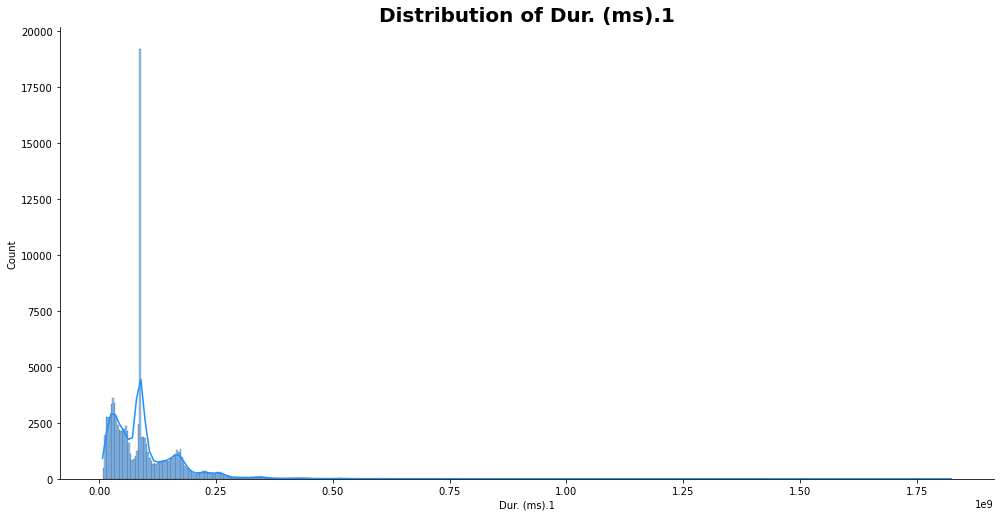

In [124]:
plot_hist(clean_data, 'Dur. (ms).1', 'dodgerblue')

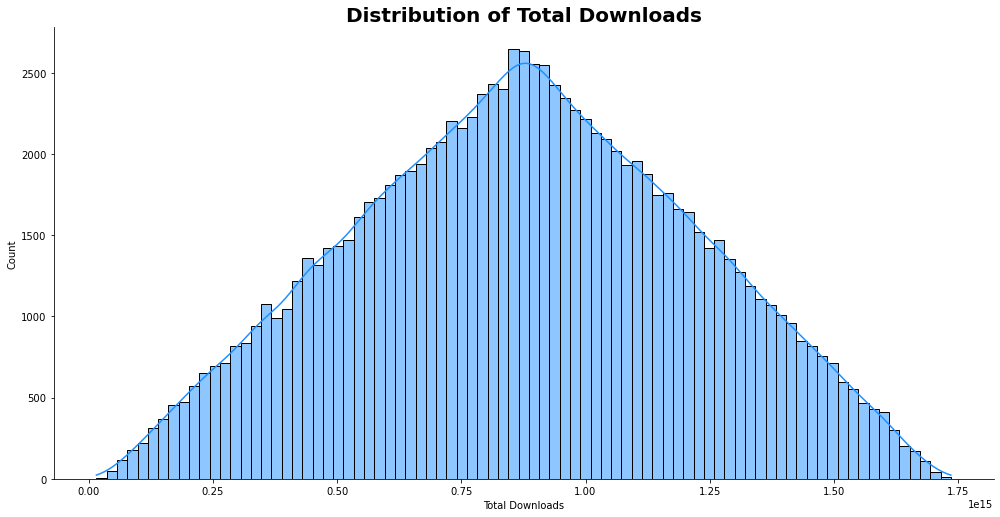

In [146]:
plot_hist(clean_data, 'Total Downloads', 'dodgerblue')